# Explore here

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import requests

In [2]:

url= "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
response_url= requests.get(url)

with open("/workspaces/Finarosalina_diabetes_machine-learning-py-template/data/raw/diabetes.csv", "wb") as file:
    file.write(response_url.content)

df = pd.read_csv('/workspaces/Finarosalina_diabetes_machine-learning-py-template/data/raw/diabetes.csv')

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


LLama la atención la columna insulina, por la gran diferencia entre la media el 50% percentil y tambíen el máximo valor de la mayor parte de columnas.

In [5]:
# Verificar si hay filas duplicadas
duplicados = df.duplicated()
print(df[duplicados])


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []



🔹 Correlación con la variable objetivo (Outcome):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


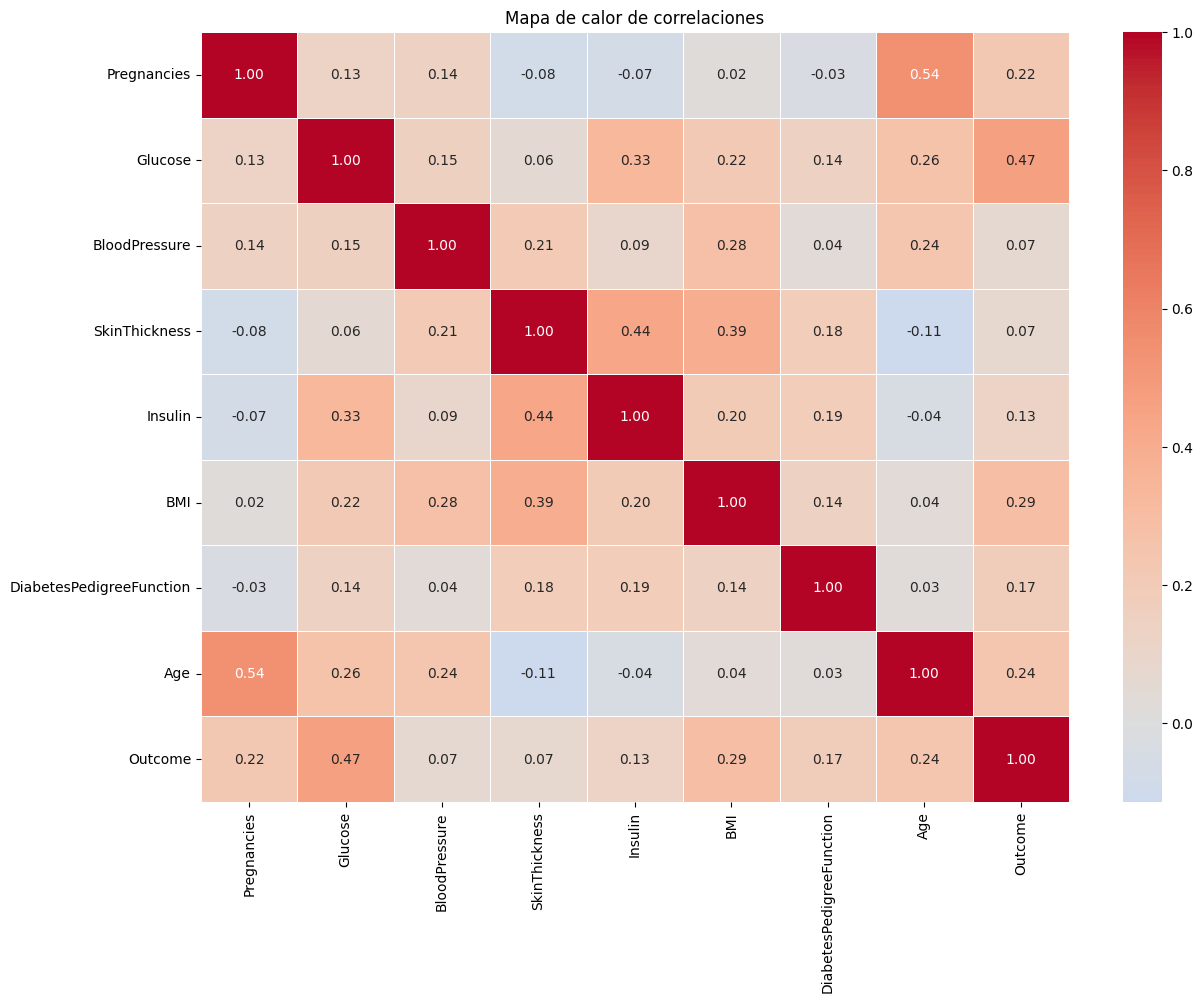

In [6]:
# Correlaciones 
print("\n🔹 Correlación con la variable objetivo (Outcome):")
correlation = df.corr(numeric_only=True)
target_corr = correlation["Outcome"].sort_values(ascending=False)
print(target_corr)


# Mapa de calor
plt.figure(figsize=(14,10))
sns.heatmap(correlation, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


las mayores correlaciones lineales se aprecian con Glucosa, embarazo, BMI, Edad y en menor medida diabetespedrigreefuction e insulina 

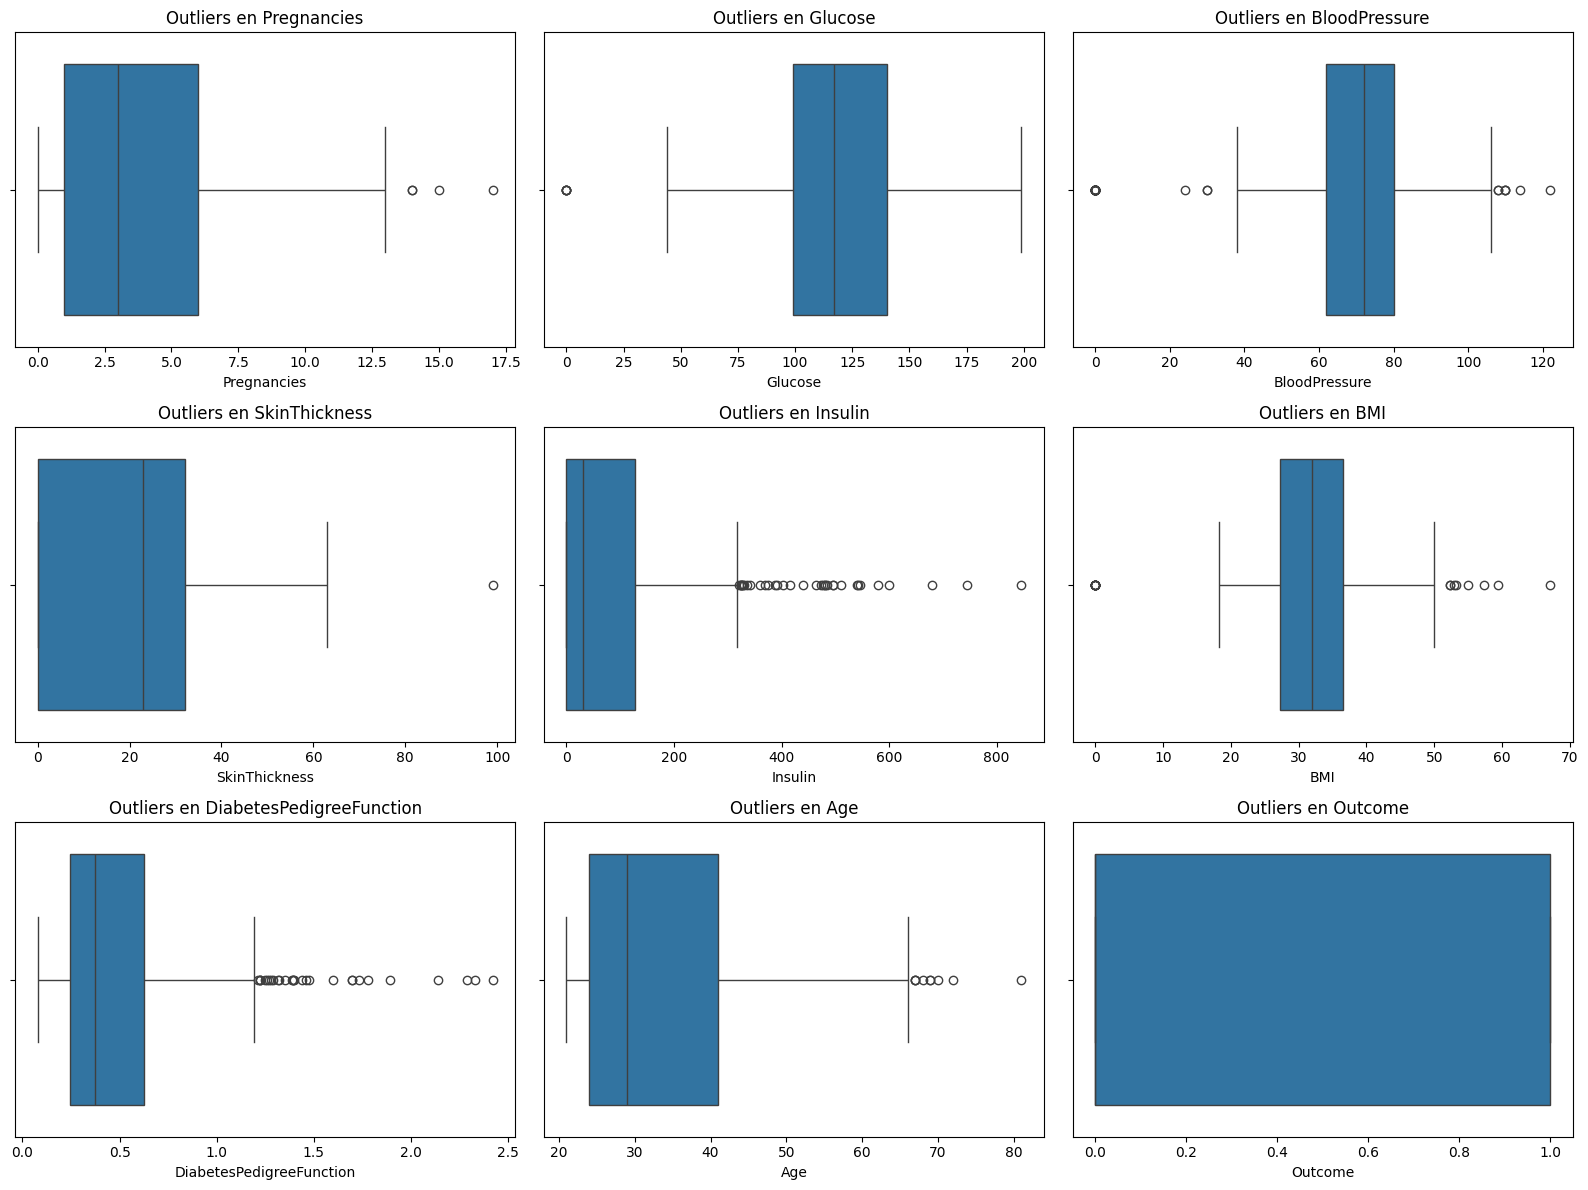

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja para cada columna del DataFrame
plt.figure(figsize=(16,12))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)  # 3 filas, 3 columnas de gráficos
    sns.boxplot(x=df[column])
    plt.title(f"Outliers en {column}")

plt.tight_layout()
plt.show()


In [8]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif

selection_model = SelectKBest(score_func=f_classif, k=7)

selection_model.fit(X_train, y_train)
selected_columns = X_train.columns[selection_model.get_support()]

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)

X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)


In [10]:
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [11]:
X_train_sel["Outcome"] = y_train.values
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [12]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [13]:

X_test_sel["Outcome"] = y_test.values
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0,0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0,0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0,0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0,0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0,0


In [14]:
X_train_sel.to_csv("/workspaces/Finarosalina_diabetes_machine-learning-py-template/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/Finarosalina_diabetes_machine-learning-py-template/data/processed/clean_test.csv", index = False)

In [15]:
X_train = X_train_sel.drop(["Outcome"], axis = 1)
y_train = X_train_sel["Outcome"]
X_test = X_test_sel.drop(["Outcome"], axis = 1)
y_test = X_test_sel["Outcome"]

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

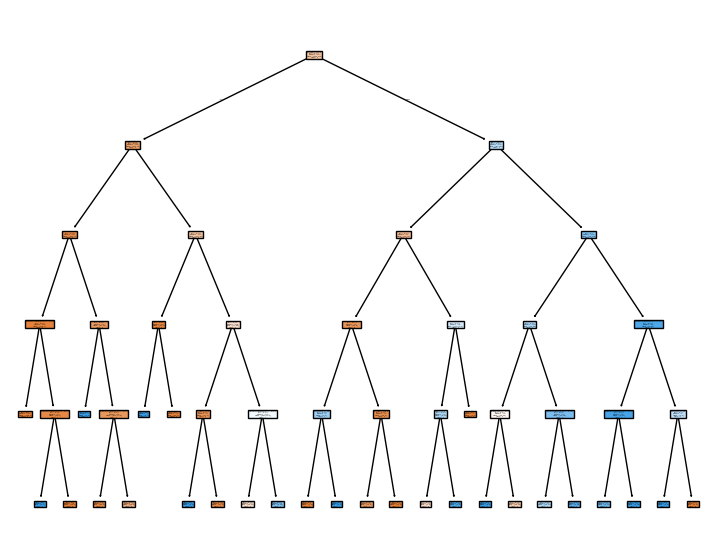

In [17]:
from sklearn import tree

fig = plt.figure(figsize=(9,7))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7987012987012987

Tras tratar de optimizar los hiperparámetros con grid search y obtener este resultado:

Mejor combinación de parámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

Mejor score (accuracy): 0.7476467477525119

Decido logicamente no hacerlo y borrar le código, quedandome con el resultado anterior.

** NUEVO PROYECTO ELIMINANDO OUTLIERS**

In [51]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import requests

In [52]:
df2 = pd.read_csv('/workspaces/Finarosalina_diabetes_machine-learning-py-template/data/raw/diabetes.csv')

df2.shape

(768, 9)

In [53]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
duplicados = df2.duplicated()

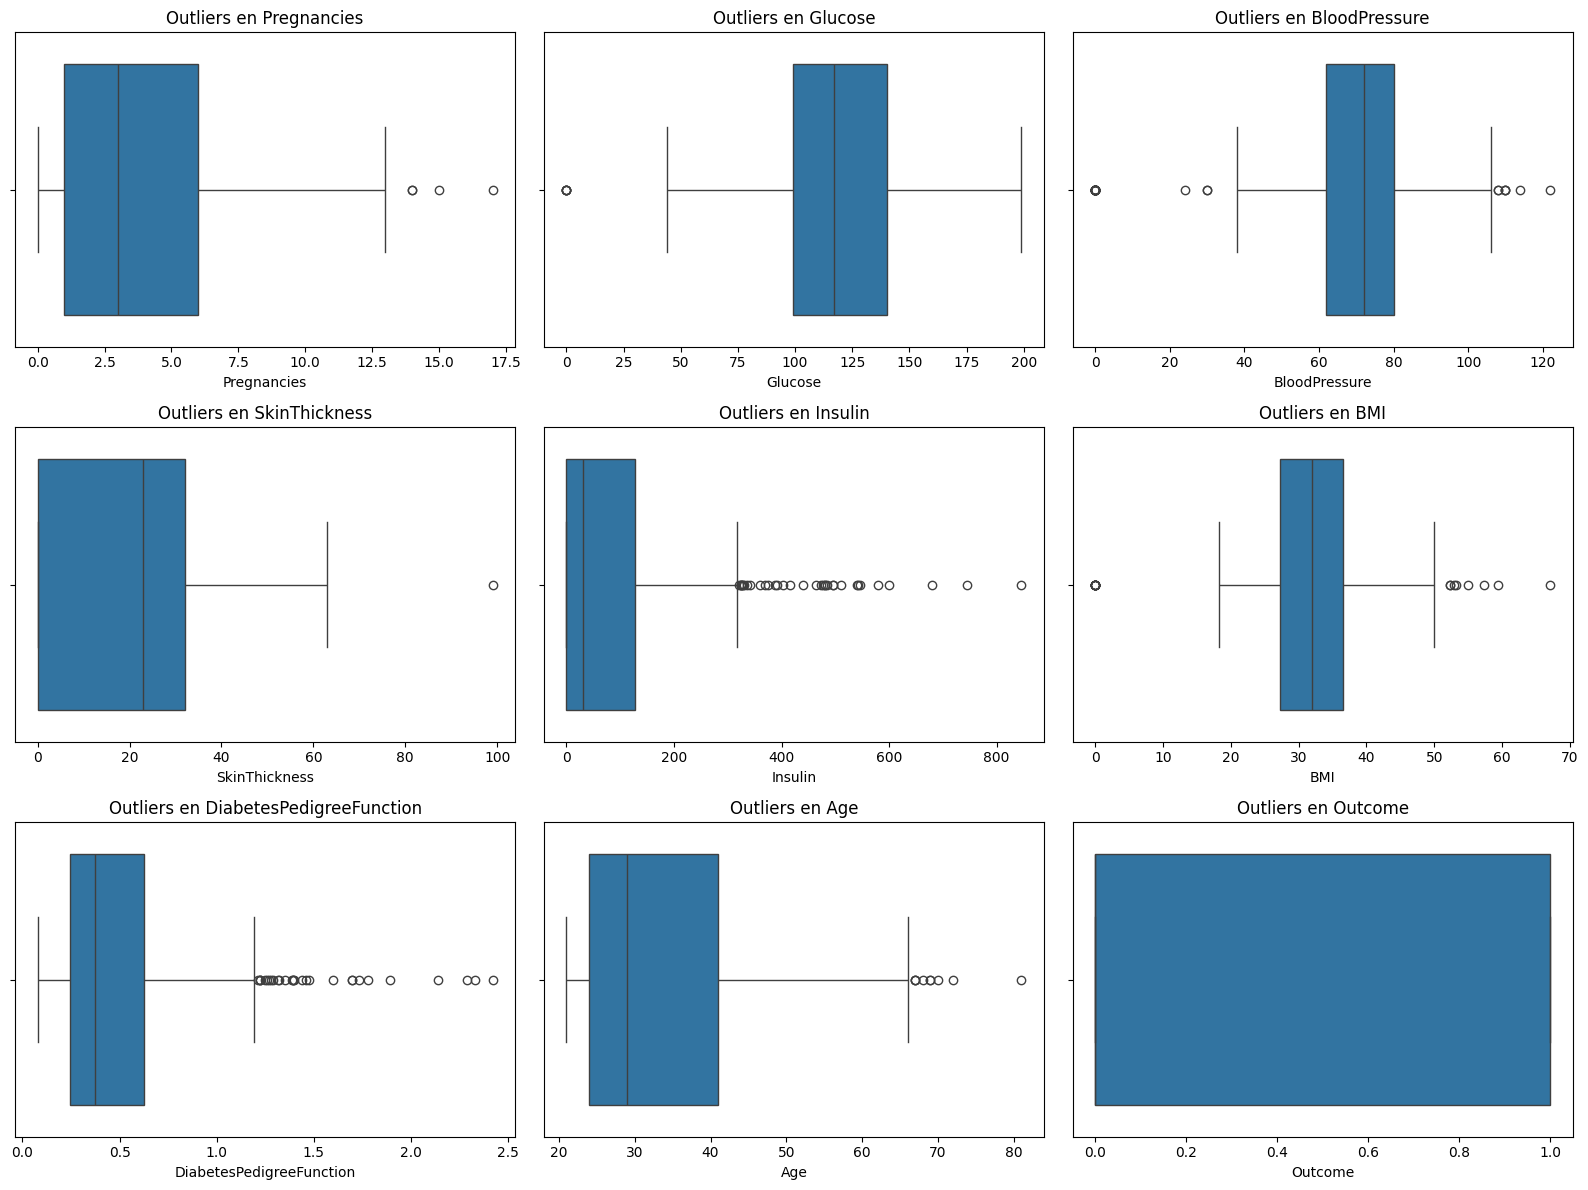

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja para cada columna del DataFrame
plt.figure(figsize=(16,12))
for i, column in enumerate(df2.columns):
    plt.subplot(3, 3, i+1)  # 3 filas, 3 columnas de gráficos
    sns.boxplot(x=df2[column])
    plt.title(f"Outliers en {column}")

plt.tight_layout()
plt.show()

VARIABLES QUE VOY A USAR: Pregnancies,	Glucose, 	BloodPressure, 	Insulin, 	BMI, 	DiabetesPedigreeFunction, 	Age

In [56]:
#  20 > BMI < 50  outliers

bmi_outliers= df2[((df2['BMI']<20) | (df2['BMI']>50) )]
bmi_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
33,6,92,92,0,0,19.9,0.188,28,0
49,7,105,0,0,0,0.0,0.305,24,0
50,1,103,80,11,82,19.4,0.491,22,0
60,2,84,0,0,0,0.0,0.304,21,0
68,1,95,66,13,38,19.6,0.334,25,0
81,2,74,0,0,0,0.0,0.102,22,0
90,1,80,55,0,0,19.1,0.258,21,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1


In [57]:
# bmi_outliers= df2[((df2['BMI']<20) | (df2['BMI']>50) )]
df2 = df2[((df2['BMI'] > 20) & (df2['BMI'] < 50))]
print("Tamaño después de eliminar outliers:", df2.shape)


Tamaño después de eliminar outliers: (734, 9)


In [58]:
# BloodPressure 40-100

bloodPressure_outliers = df2[((df2['BloodPressure'] < 40) | (df2['BloodPressure'] > 100))]
bloodPressure_outliers.shape

(41, 9)

In [59]:
df2 = df2[((df2['BloodPressure'] > 40) & (df2['BloodPressure'] < 100))]
print("Tamaño después de eliminar outliers:", df2.shape)

Tamaño después de eliminar outliers: (690, 9)


In [60]:
# Pregnancies > 13

Pregnancies = df2[df2['Pregnancies']> 13]
Pregnancies.shape

(4, 9)

In [61]:
df2 = df2[df2['Pregnancies']<= 13]
print("Tamaño después de eliminar outliers:", df2.shape)

Tamaño después de eliminar outliers: (686, 9)


In [62]:
# Glucose 0

Glucose_outliers = df2[df2['Glucose']== 0]
Glucose_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [63]:
df2 = df2[df2['Glucose'] != 0]
print("Tamaño después de eliminar outliers:", df2.shape)

Tamaño después de eliminar outliers: (681, 9)


In [ ]:
# VARIABLES QUE VOY A USAR: Pregnancies,	Glucose, 	BloodPressure, 	Insulin, 	BMI, 	DiabetesPedigreeFunction, 	Age
df2 = df2.drop('SkinThickness', axis=1)


In [65]:
# Age > 68

Age_outliers = df2[df2['Age']> 67]
Age_outliers

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,26.8,0.186,69,0
459,9,134,74,60,25.9,0.460,81,0
666,4,145,82,0,32.5,0.235,70,1
674,8,91,82,0,35.6,0.587,68,0


In [66]:
df2=df2[df2['Age']< 67]
print("Tamaño después de eliminar outliers:", df2.shape)

Tamaño después de eliminar outliers: (674, 8)


In [68]:
# Insulin
Insulin_outliers= df2[df2['Insulin']>320]
Insulin_outliers.shape

(32, 8)

In [69]:
df2=df2[df2['Insulin']< 320]
print("Tamaño después de eliminar outliers:", df2.shape)

Tamaño después de eliminar outliers: (642, 8)


In [ ]:
# DiabetesPedigreeFunction  tiene demasiados para eliminar.
DiabetesPedigreeFunction_outliers= df2[df2['Insulin']>1.6]
DiabetesPedigreeFunction_outliers

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,94,28.1,0.167,21,0
6,3,78,50,88,31.0,0.248,26,1
14,5,166,72,175,25.8,0.587,51,1
16,0,118,84,230,45.8,0.551,31,1
19,1,115,70,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...
751,1,121,78,74,39.0,0.261,28,0
755,1,128,88,110,36.5,1.057,37,1
760,2,88,58,16,28.4,0.766,22,0
763,10,101,76,180,32.9,0.171,63,0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df2.drop("Outcome", axis=1) 
y = df2["Outcome"] 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=5)

clf.fit(X_train2, y_train2)


y_pred2 = clf.predict(X_test2)


accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))


Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        90
           1       0.61      0.59      0.60        39

    accuracy                           0.76       129
   macro avg       0.71      0.71      0.71       129
weighted avg       0.76      0.76      0.76       129



In [80]:
# Guardar los conjuntos de datos como archivos CSV
X_train2.to_csv('X_train2.csv', index=False)
X_test2.to_csv('X_test2.csv', index=False)
y_train2.to_csv('y_train2.csv', index=False)
y_test2.to_csv('y_test2.csv', index=False)


In [82]:
from pickle import dump

dump(clf, open("/workspaces/Finarosalina_diabetes_machine-learning-py-template/models/decision_tree_classifier_default_42.sav", "wb"))

In [83]:
import json

# Rutas de archivo
notebook_path = "/workspaces/Finarosalina_diabetes_machine-learning-py-template/src/explore.ipynb"
output_path = "/workspaces/Finarosalina_diabetes_machine-learning-py-template/src/app.py"

# Leer el archivo .ipynb como JSON
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = json.load(f)

# Extraer el código de las celdas tipo "code"
code_cells = []
for cell in notebook.get('cells', []):
    if cell.get('cell_type') == 'code':
        code = ''.join(cell.get('source', []))
        code_cells.append(code)

# Combinar el código y escribirlo en el archivo .py
with open(output_path, 'w', encoding='utf-8') as f:
    f.write("# Código extraído desde explore.ipynb\n\n")
    f.write("\n\n".join(code_cells))

print("✅ Código copiado exitosamente a app.py")


✅ Código copiado exitosamente a app.py
